In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline
from sklearn.linear_model import LinearRegression

In [2]:
os.chdir("C:/Users/Pooja Kathe/Desktop/linear_regression dataset/TaxiFarePrediction/Taxi Fare Prediction/Dataset")
import pandas as pd

df=pd.read_csv("TaxiFare.csv")

In [3]:
df

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1
...,...,...,...,...,...,...,...,...
49995,25:15.0,15.0,2013-06-12 23:25:15 UTC,-73.999973,40.748531,-74.016899,40.705993,1
49996,19:18.0,7.5,2015-06-22 17:19:18 UTC,-73.984756,40.768211,-73.987366,40.760597,1
49997,53:00.0,6.9,2011-01-30 04:53:00 UTC,-74.002698,40.739428,-73.998108,40.759483,1
49998,09:00.0,4.5,2012-11-06 07:09:00 UTC,-73.946062,40.777567,-73.953450,40.779687,2


In [4]:
df.columns

Index(['unique_id', 'amount', 'date_time_of_pickup', 'longitude_of_pickup',
       'latitude_of_pickup', 'longitude_of_dropoff', 'latitude_of_dropoff',
       'no_of_passenger'],
      dtype='object')

In [5]:
df.shape

(50000, 8)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   unique_id             50000 non-null  object 
 1   amount                50000 non-null  float64
 2   date_time_of_pickup   50000 non-null  object 
 3   longitude_of_pickup   50000 non-null  float64
 4   latitude_of_pickup    50000 non-null  float64
 5   longitude_of_dropoff  50000 non-null  float64
 6   latitude_of_dropoff   50000 non-null  float64
 7   no_of_passenger       50000 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 3.1+ MB


In [7]:
df.isna().sum()

unique_id               0
amount                  0
date_time_of_pickup     0
longitude_of_pickup     0
latitude_of_pickup      0
longitude_of_dropoff    0
latitude_of_dropoff     0
no_of_passenger         0
dtype: int64

In [10]:
df.describe()

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,11.364171,-72.509756,39.933759,-72.504616,39.926251,1.667840
std,9.685557,10.393860,6.224857,10.407570,6.014737,1.289195
min,-5.000000,-75.423848,-74.006893,-84.654241,-74.006377,0.000000
25%,6.000000,-73.992062,40.734880,-73.991152,40.734371,1.000000
50%,8.500000,-73.981840,40.752678,-73.980082,40.753372,1.000000
75%,12.500000,-73.967148,40.767360,-73.963584,40.768167,2.000000
max,200.000000,40.783472,401.083332,40.851027,43.415190,6.000000


In [9]:
df.describe(include="object")

,unique_id,date_time_of_pickup
count,50000,50000
unique,3597,49555
top,26:00.0,2011-09-03 01:30:00 UTC
freq,457,3


In [11]:
df.drop("unique_id",inplace=True,axis=1)

In [19]:
df.drop("date_time_of_pickup",inplace=True,axis=1)

In [12]:
df.columns

Index(['amount', 'date_time_of_pickup', 'longitude_of_pickup',
       'latitude_of_pickup', 'longitude_of_dropoff', 'latitude_of_dropoff',
       'no_of_passenger'],
      dtype='object')

In [14]:
ddf=df[:]

### split the data into train_test

In [21]:
## take the values as X and Y
X=df[['longitude_of_pickup',
       'latitude_of_pickup', 'longitude_of_dropoff', 'latitude_of_dropoff',
       'no_of_passenger']]
y=df["amount"]

In [77]:
## split data into train and test 
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=100)

### Regression model base on train_test split

In [78]:
model=LinearRegression()

In [79]:
model.fit(X_train,y_train)

LinearRegression()

In [80]:
## prediction for a single data point
yhat_t=model.predict(X_test)

In [81]:
yhat_t[0:4]

array([11.26762787, 11.3695551 , 11.26491858, 11.68446558])

In [82]:
y_test[0:4]

4253     25.7
30076     9.7
48047     4.5
1666      4.9
Name: amount, dtype: float64

In [83]:
from sklearn.metrics import mean_squared_error,r2_score
mse=mean_squared_error(y_test,yhat_t)
r_squared=r2_score(y_test,yhat_t)

In [84]:
from math import sqrt
rmse=sqrt(mse)

In [85]:
print("mean_squared_error:",mse)
print("root_mean_squared_error:",rmse)
print("r_squard_value",r_squared)

mean_squared_error: 92.86446457213349
root_mean_squared_error: 9.636621014242154
r_squard_value 0.00042898458915729965


### Random forest Model

In [86]:
from sklearn.ensemble import RandomForestRegressor

In [87]:
rf=RandomForestRegressor()

In [88]:
rf.fit(X_train,y_train)

RandomForestRegressor()

In [89]:
rf.fit(X_train,y_train)

RandomForestRegressor()

In [90]:
ypred=rf.predict(X_test)

In [91]:
ypred[0:5]

array([24.6645, 12.9154,  4.86  , 16.1567, 10.074 ])

In [92]:
rf.feature_importances_

array([0.27235057, 0.13262377, 0.40057546, 0.1860274 , 0.0084228 ])

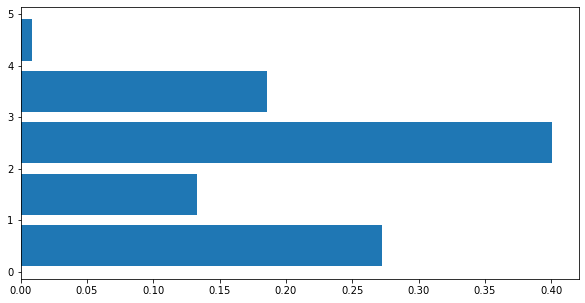

In [93]:
feature_importance=rf.feature_importances_
sorted_idx=np.argsort(feature_importance)
pos=np.arange(sorted_idx.shape[0])+ .5
fig=plt.figure(figsize=(10,5))
plt.barh(pos,feature_importance,align="center")

plt.show()

In [94]:
from sklearn.metrics import mean_squared_error,r2_score
mse=mean_squared_error(y_test,ypred)
r_squared=r2_score(y_test,ypred)

In [95]:
from math import sqrt
rmse=sqrt(mse)

In [96]:
print("mean_squared_error:",mse)
print("root_mean_squared_error:",rmse)
print("r_squard_value",r_squared)

mean_squared_error: 23.60043619186016
root_mean_squared_error: 4.858028014725745
r_squard_value 0.7459705165250543


In [97]:
from time import time
from scipy.stats import randint as sp_randint
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

In [99]:
rf1=RandomForestRegressor(random_state=42)

In [100]:
from pprint import pprint

In [101]:
## look at the parameter use by current forest
print("Parameter currently in use;\n")
pprint(rf1.get_params())

Parameter currently in use;

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [102]:
## create function to generate report
def report(results,n_top=3):
    for i in range(1,n_top+1):
        candidates=np.flatnonzero(results["rank_test_score"]==i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("model with rank:{0: .3f} (std: {1: .3f})".format(results["mean_test_score"][candidate],
                                                                   results["std_test_score"][candidate]))
            print("Parameters: {0}" .format(results["params"][candidate]))
            print("")
    

In [103]:
## specipy parameter and distribution to sample fram
param_dist={"max_depth":[5,None],                ##try [3,4,5,None] 
           "max_features":[1,3,10],
           "min_samples_split":[2,3,10],
            #"min_samples_leaf":sp_randint(2,5),
            #"max_leaf_nodes":sp_randint(2,10),
            "bootstrap":[True,False],
           "criterion":["auto"]}

In [104]:
## run randomized search
n_iter_search=20
random_search=RandomizedSearchCV(rf1,param_distributions=param_dist,n_iter=n_iter_search,cv=5)

In [105]:
start=time()
random_search.fit(X_train,y_train)
print("Randomized search too %.2f second for %d candidates" "parameter setting."%((time()-start),n_iter_search))
report(random_search.cv_results_)

C:\Users\Pooja Kathe\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Pooja Kathe\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Pooja Kathe\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\Pooja Kathe\anaconda3\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\Pooja Kathe\anaconda3\lib\site-packages\joblib\parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\Pooja Kathe\anaconda3\lib\site-packages\joblib\parallel.py", line 784, in _dispatch
    job = self._bac

C:\Users\Pooja Kathe\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Pooja Kathe\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Pooja Kathe\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\Pooja Kathe\anaconda3\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\Pooja Kathe\anaconda3\lib\site-packages\joblib\parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\Pooja Kathe\anaconda3\lib\site-packages\joblib\parallel.py", line 784, in _dispatch
    job = self._bac

C:\Users\Pooja Kathe\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Pooja Kathe\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Pooja Kathe\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\Pooja Kathe\anaconda3\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\Pooja Kathe\anaconda3\lib\site-packages\joblib\parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\Pooja Kathe\anaconda3\lib\site-packages\joblib\parallel.py", line 784, in _dispatch
    job = self._bac

C:\Users\Pooja Kathe\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Pooja Kathe\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Pooja Kathe\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\Pooja Kathe\anaconda3\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\Pooja Kathe\anaconda3\lib\site-packages\joblib\parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\Pooja Kathe\anaconda3\lib\site-packages\joblib\parallel.py", line 784, in _dispatch
    job = self._bac

C:\Users\Pooja Kathe\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Pooja Kathe\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Pooja Kathe\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\Pooja Kathe\anaconda3\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\Pooja Kathe\anaconda3\lib\site-packages\joblib\parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\Pooja Kathe\anaconda3\lib\site-packages\joblib\parallel.py", line 784, in _dispatch
    job = self._bac

C:\Users\Pooja Kathe\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Pooja Kathe\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Pooja Kathe\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\Pooja Kathe\anaconda3\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\Pooja Kathe\anaconda3\lib\site-packages\joblib\parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\Pooja Kathe\anaconda3\lib\site-packages\joblib\parallel.py", line 784, in _dispatch
    job = self._bac

C:\Users\Pooja Kathe\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Pooja Kathe\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Pooja Kathe\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\Pooja Kathe\anaconda3\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\Pooja Kathe\anaconda3\lib\site-packages\joblib\parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\Pooja Kathe\anaconda3\lib\site-packages\joblib\parallel.py", line 784, in _dispatch
    job = self._bac

C:\Users\Pooja Kathe\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Pooja Kathe\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Pooja Kathe\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\Pooja Kathe\anaconda3\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\Pooja Kathe\anaconda3\lib\site-packages\joblib\parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\Pooja Kathe\anaconda3\lib\site-packages\joblib\parallel.py", line 784, in _dispatch
    job = self._bac

Randomized search too 728.50 second for 20 candidatesparameter setting.
Model with rank: 1
model with rank: 0.748 (std:  0.029)
Parameters: {'min_samples_split': 10, 'max_features': 3, 'max_depth': None, 'criterion': 'mse', 'bootstrap': True}

Model with rank: 2
model with rank: 0.744 (std:  0.029)
Parameters: {'min_samples_split': 3, 'max_features': 3, 'max_depth': None, 'criterion': 'mse', 'bootstrap': True}

Model with rank: 3
model with rank: 0.738 (std:  0.030)
Parameters: {'min_samples_split': 10, 'max_features': 3, 'max_depth': None, 'criterion': 'mse', 'bootstrap': False}



In [ ]:
param_grid={"max_depth":[5,None],                ##try [3,4,5,None] 
           "max_features":[1,3,15],
           "min_samples_split":[2,3,15],
            "bootstrap":[True,False],
           "criterion":["mse"]}

In [ ]:
grid_search=GridSearchCV(rf1,param_grid=param_grid,cv=5)

In [ ]:
start=time()
grid_search.fit(X_train,y_train)
print("GridSearchCV search took %.2f second for %d candidate" "parameter settings."%((time()-start),
                                                                                     len(grid_search.cv_results_["params"])))
report(grid_search.cv_results_)